16


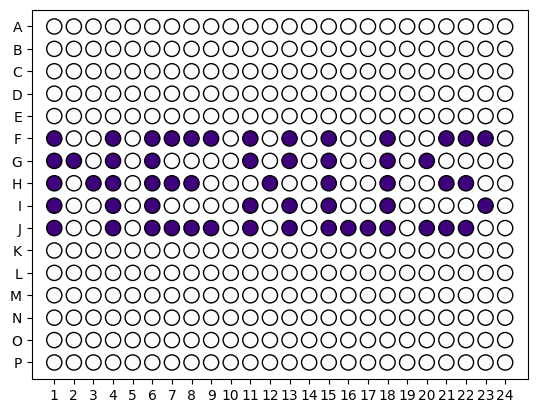

In [52]:
from collections import namedtuple


class VisualWellPlate:
    
    def __init__(self, num_rows, num_cols, well_size):
        self._wells = np.zeros(shape=(num_rows, num_cols), dtype=np.int32)
        xaxis = np.linspace(1, num_rows, num_rows)
        yaxis = np.linspace(1, num_cols, num_cols)
        x, y = np.meshgrid(xaxis, yaxis)
        self._well_pos = namedtuple('XY', 'x y')(x, y)
        self._well_size = well_size
        
    
    def well_pos(self):
        return self._well_pos
    
    def set_val(self, pos, val):
        x, y = pos
        self._wells[x-1, y-1] = val
    
    def well_vals(self):
        return self._wells
    
    def ysize(self):
        return self._wells.shape[1]
    
    def xsize(self):
        return self._wells.shape[0]
    
    def well_size(self):
        return self._well_size

def create_96_well_plate():
    return VisualWellPlate(num_rows=8, num_cols=12, well_size=480)

def create_384_well_plate():
    return VisualWellPlate(num_rows=16, num_cols=24, well_size=120)

def char_range(start, n): 
    return [chr(c) for c in range(ord(start), ord(start)+n)]

import numpy as np

def viz_put_dye(plate, well, volume):
    plate.set_val(well, volume)
    
def put_dye(plate, well, volume, pipette=None, dye=None):
    pipette.aspirate(dye, volume)
    pipette.dispense(plate[well], volume)
    
def print_nexus(viz_plate): 
    def hline(s, l):
        x, y = s
        for dy in range(0, l):
            viz_put_dye(viz_plate, (x, y+dy), 50)
    
    def vline(s, l):
        x, y = s
        for dx in range(0, l):
            viz_put_dye(viz_plate, (x+dx, y), 50)
    
    def dot(s):
        viz_put_dye(viz_plate, s, 50)
    
    t = 6
    # N
    vline((t, 1), 5)
    dot((t+1, 2))
    dot((t+2, 3))
    vline((t, 4), 5)
    
    # E
    vline((t, 6), 5)
    hline((t, 7), 3)
    hline((t+2, 7), 2)
    hline((t+4,  7), 3)
    
    # X
    vline((t, 11), 2)
    vline((t+3, 11), 2)
    vline((t, 13), 2)
    vline((t+3, 13), 2)
    dot((t+2, 12))
    
    
    # U
    vline((t, 15), 5)
    vline((t, 18), 5)
    hline((t+4, 16), 2)
    
    # S
    hline((t, 21), 3)
    dot((t+1, 20))
    hline((t+2, 21), 2)
    dot((t+3, 23))
    hline((t+4, 20), 3)
    
    
def show_plate(viz_plate):
    import matplotlib.pyplot as plt
    plt.scatter(x=viz_plate.well_pos().y, y=viz_plate.well_pos().x,
                marker='o', facecolors='none', edgecolors='black', 
                s=viz_plate.well_size(), c=viz_plate.well_vals().T, cmap='Purples')
    plt.gca().invert_yaxis()
    plt.yticks(np.arange(1, viz_plate.xsize()+1), char_range('A', viz_plate.xsize()))
    plt.xticks(np.arange(1, viz_plate.ysize()+1))
    print(viz_plate.xsize())
viz_plate = create_384_well_plate()
print_nexus(viz_plate)
show_plate(viz_plate)